In [1]:
# ondoing main libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# import jupyterthemes as jt
# from jupyterthemes import jtplot
# !jt -t onedork -ofs 10 -dfs 9 -nfs 11 -tfs 11
# jtplot.style(theme = 'onedork', fscale = 1.4 , context = 'notebook', ticks = True, 
#              grid = False)

In [3]:
!jt -r

Reset css and font defaults in:
/home/tater/.jupyter/custom &
/home/tater/.local/share/jupyter/nbextensions


In [4]:
# hiding possible warning in the system
import warnings
warnings.filterwarnings('ignore')

In [5]:
df_1 = pd.read_csv("Cryofreezer_all_variables_29.csv", delimiter=',')
df_2 = pd.read_csv("Cryofreezer_all_variables_30.csv", delimiter=',')
df_3 = pd.read_csv("Cryofreezer_all_variables_31.csv", delimiter=',')
df_4 = pd.read_csv("Cryofreezer_all_variables_32.csv", delimiter=',')
df_5 = pd.read_csv("Cryofreezer_all_variables_33.csv", delimiter=',')

In [6]:
# entering a deltatime between to moments of experiments
def deltatime(dataframe):
    begin = dataframe[0]
    for i in range(len(dataframe)):   
        cur = dataframe[i]
        delta = cur - begin
        dataframe[i] = delta.seconds

In [20]:
#file concatanation
df_all = pd.concat((df_1, df_2, df_3, df_4, df_5), ignore_index=True)
df_all_1 = df_1
df_all_2 = df_2
df_all_3 = df_3
df_all_4 = df_4
df_all_5 = df_5

In [21]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38031 entries, 0 to 38030
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   BeltAmpere_belt1            38031 non-null  float64
 1   BeltAmpere_belt1_qc         38031 non-null  int64  
 2   BeltAmpere_belt2            38031 non-null  float64
 3   BeltAmpere_belt2_qc         38031 non-null  int64  
 4   BeltAmpere_belt3            38031 non-null  float64
 5   BeltAmpere_belt3_qc         38031 non-null  int64  
 6   Cumulative_LIN_flow         38031 non-null  int64  
 7   Cumulative_LIN_flow_qc      38031 non-null  int64  
 8   Cumulative_product_flow     38031 non-null  int64  
 9   Cumulative_product_flow_qc  38031 non-null  int64  
 10  FanAmpere_exhaust1          38031 non-null  float64
 11  FanAmpere_exhaust1_qc       38031 non-null  int64  
 12  FanAmpere_exhaust2          38031 non-null  float64
 13  FanAmpere_exhaust2_qc       380

In [24]:
df_all_short = df_all.iloc[:, ::2]
df_all_short_1 = df_all_1.iloc[:, ::2]
df_all_short_2 = df_all_2.iloc[:, ::2]
df_all_short_3 = df_all_3.iloc[:, ::2]
df_all_short_4 = df_all_4.iloc[:, ::2]
df_all_short_5 = df_all_5.iloc[:, ::2]

In [25]:
df_all_short_1["_time"] = pd.to_datetime(df_all_short_1["_time"])
df_all_short_2["_time"] = pd.to_datetime(df_all_short_2["_time"])
df_all_short_3["_time"] = pd.to_datetime(df_all_short_3["_time"])
df_all_short_4["_time"] = pd.to_datetime(df_all_short_4["_time"])
df_all_short_5["_time"] = pd.to_datetime(df_all_short_5["_time"])

In [26]:
df_all_short

,BeltAmpere_belt1,BeltAmpere_belt2,BeltAmpere_belt3,Cumulative_LIN_flow,Cumulative_product_flow,FanAmpere_exhaust1,FanAmpere_exhaust2,FanAmpere_side,FanAmpere_top,Fanspeed_exhaust1,...,ResidenceTime_belt2,ResidenceTime_belt3,Temp_exhaust_in,Temp_exhaust_out,Temp_product_in,Temp_product_out,Temp_tunnel_measured,Temp_tunnel_set,Vanne_opening_rate,_time
0,0.002441,0.002441,0.002441,317404,158249,0.002182,0.002618,0.000000,0.000000,0,...,0,0,17.1,14.3,10.357108,0.000000,16.9,0,0.0,2020-09-04T20:56:07.400Z
1,0.000000,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,0,...,0,0,0.0,0.0,0.000000,0.000000,0.0,0,0.0,2020-09-04T20:57:07.338Z
2,0.000000,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,0,...,0,0,0.0,0.0,0.000000,0.000000,0.0,0,0.0,2020-09-04T20:58:28.422Z
3,0.002441,0.002441,0.002441,317404,158249,0.002182,0.002618,0.000000,0.000000,0,...,0,0,16.7,13.8,12.060572,7.590608,15.0,0,0.0,2020-09-04T20:59:07.374Z
4,0.000000,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,0,...,0,0,0.0,0.0,0.000000,0.000000,0.0,0,0.0,2020-09-04T21:00:28.093Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38026,0.000000,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,0,...,0,0,0.0,0.0,0.000000,0.000000,0.0,0,0.0,2020-10-10T07:19:43.564Z
38027,0.002441,0.001831,0.002441,153384,131248,0.002618,0.002618,0.017853,0.017853,0,...,0,0,10.2,10.1,0.000000,0.000000,8.6,0,0.0,2020-10-10T07:20:43.589Z
38028,0.002441,0.001831,0.002441,153384,131248,0.002182,0.002618,0.017853,0.017853,0,...,0,0,10.2,10.1,0.000000,0.000000,8.6,0,0.0,2020-10-10T07:21:42.192Z
38029,0.000000,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,0,...,0,0,0.0,0.0,0.000000,0.000000,0.0,0,0.0,2020-10-10T07:23:05.328Z


In [27]:
df_all_short.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38031 entries, 0 to 38030
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   BeltAmpere_belt1         38031 non-null  float64
 1   BeltAmpere_belt2         38031 non-null  float64
 2   BeltAmpere_belt3         38031 non-null  float64
 3   Cumulative_LIN_flow      38031 non-null  int64  
 4   Cumulative_product_flow  38031 non-null  int64  
 5   FanAmpere_exhaust1       38031 non-null  float64
 6   FanAmpere_exhaust2       38031 non-null  float64
 7   FanAmpere_side           38031 non-null  float64
 8   FanAmpere_top            38031 non-null  float64
 9   Fanspeed_exhaust1        38031 non-null  int64  
 10  Fanspeed_exhaust2        38031 non-null  int64  
 11  Fanspeed_side            38031 non-null  int64  
 12  Fanspeed_top             38031 non-null  int64  
 13  LIN_flow                 38031 non-null  float64
 14  Product_flow          

In [29]:
x_time_1 = df_all_short_1["_time"]
y_LIN_1 = df_all_short_1["LIN_flow"]
y_PROD_1 = df_all_short_1["Product_flow"]

x_time_2 = df_all_short_2["_time"]
y_LIN_2 = df_all_short_2["LIN_flow"]
y_PROD_2 = df_all_short_2["Product_flow"]

x_time_3 = df_all_short_3["_time"]
y_LIN_3 = df_all_short_3["LIN_flow"]
y_PROD_3 = df_all_short_3["Product_flow"]

x_time_4 = df_all_short_4["_time"]
y_LIN_4 = df_all_short_4["LIN_flow"]
y_PROD_4 = df_all_short_4["Product_flow"]

x_time_5 = df_all_short_5["_time"]
y_LIN_5 = df_all_short_5["LIN_flow"]
y_PROD_5 = df_all_short_5["Product_flow"]

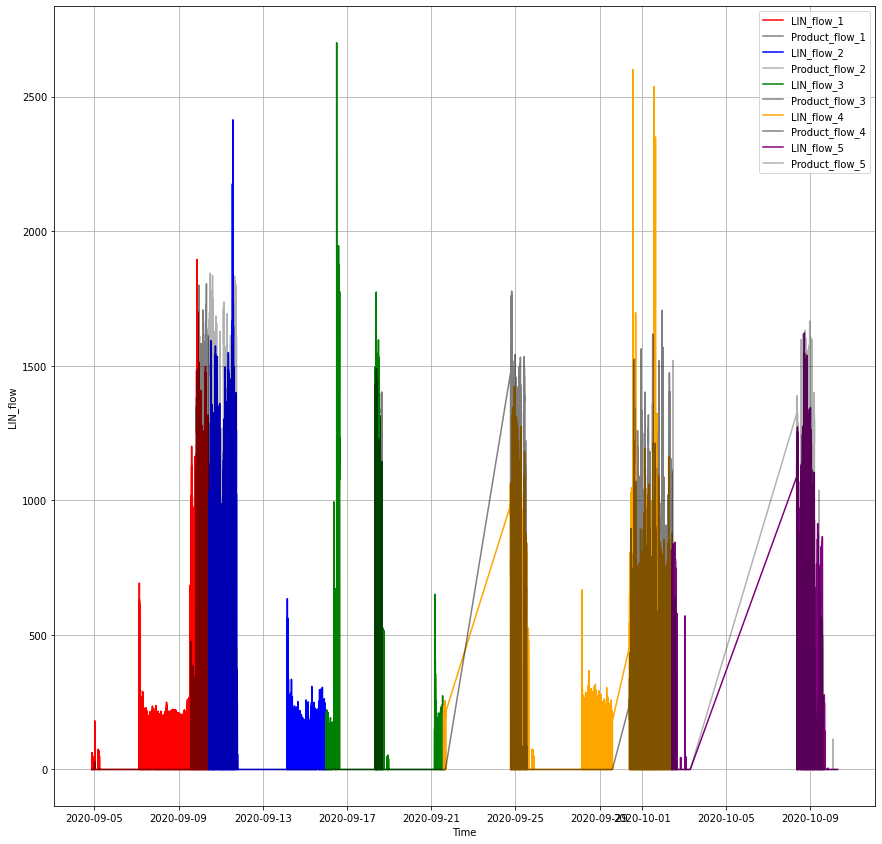

In [31]:
plt.figure(figsize=(50, 50))
ax = plt.subplot(3,3,3)
plt.plot(x_time_1, y_LIN_1, color="red", label="LIN_flow_1")
plt.plot(x_time_1, y_PROD_1, color="black", label="Product_flow_1", alpha=0.5)


plt.plot(x_time_2, y_LIN_2, color="blue", label="LIN_flow_2")
plt.plot(x_time_2, y_PROD_2, color="black", label="Product_flow_2", alpha=0.3)

plt.plot(x_time_3, y_LIN_3, color="green", label="LIN_flow_3")
plt.plot(x_time_3, y_PROD_3, color="black", label="Product_flow_3", alpha=0.5)

plt.plot(x_time_4, y_LIN_4, color="orange", label="LIN_flow_4")
plt.plot(x_time_4, y_PROD_4, color="black", label="Product_flow_4", alpha=0.5)

plt.plot(x_time_5, y_LIN_5, color="purple", label="LIN_flow_5")
plt.plot(x_time_5, y_PROD_5, color="black", label="Product_flow_5", alpha=0.3)


plt.xlabel("Time")
plt.ylabel("LIN_flow")
plt.grid(True)
plt.legend()

In [32]:
df_w_o_prod_flow_1 = df_all_short_1[df_all_short_1["Product_flow"] >= 1.175381e-33]
df_w_o_prod_flow_1 = df_w_o_prod_flow_1[df_all_short_1["Product_flow"] != 0]

In [33]:
df_w_o_prod_flow_2 = df_all_short_2[df_all_short_2["Product_flow"] >= 1.175381e-33]
df_w_o_prod_flow_2 = df_w_o_prod_flow_2[df_all_short_2["Product_flow"] != 0]

In [34]:
df_w_o_prod_flow_3 = df_all_short_3[df_all_short_3["Product_flow"] >= 1.175381e-33]
df_w_o_prod_flow_3 = df_w_o_prod_flow_3[df_all_short_3["Product_flow"] != 0]

In [35]:
df_w_o_prod_flow_4 = df_all_short_4[df_all_short_4["Product_flow"] >= 1.175381e-33]
df_w_o_prod_flow_4 = df_w_o_prod_flow_4[df_all_short_4["Product_flow"] != 0]

In [36]:
df_w_o_prod_flow_5 = df_all_short_5[df_all_short_5["Product_flow"] >= 1.175381e-33]
df_w_o_prod_flow_5 = df_w_o_prod_flow_5[df_all_short_5["Product_flow"] != 0]

In [37]:
df_w_o_prod_flow.shape

NameError: name 'df_w_o_prod_flow' is not defined

In [19]:
df_w_o_prod_flow.reset_index(inplace=True, drop=True)

In [20]:
df_w_o_prod_flow

,BeltAmpere_belt1,BeltAmpere_belt2,BeltAmpere_belt3,Cumulative_LIN_flow,Cumulative_product_flow,FanAmpere_exhaust1,FanAmpere_exhaust2,FanAmpere_side,FanAmpere_top,Fanspeed_exhaust1,...,ResidenceTime_belt2,ResidenceTime_belt3,Temp_exhaust_in,Temp_exhaust_out,Temp_product_in,Temp_product_out,Temp_tunnel_measured,Temp_tunnel_set,Vanne_opening_rate,_time
0,1.570435,1.475830,1.376343,317404,158249,3.082739,3.447571,8.164215,8.456726,100,...,60,60,13.0,12.5,0.0,0.0,11.9,10,8.152407,2020-09-05 00:22:07.311000+00:00
1,1.569214,1.478882,1.375732,317404,158249,3.013788,3.401749,8.146362,8.444366,100,...,60,60,12.4,11.1,0.0,0.0,11.7,10,18.132671,2020-09-05 00:23:08.729000+00:00
2,1.570435,1.483154,1.378784,317404,158249,3.031244,3.449317,8.101044,8.422394,100,...,60,60,12.3,10.9,0.0,0.0,11.5,10,29.087076,2020-09-05 00:24:07.310000+00:00
3,1.571045,1.483765,1.379395,317407,158249,3.035608,3.482919,8.121643,8.415527,100,...,60,60,12.1,10.9,0.0,0.0,11.1,10,35.764454,2020-09-05 00:25:08.745000+00:00
4,1.569824,1.484985,1.382446,317410,158249,3.017715,3.401312,8.095551,8.432007,100,...,60,60,11.8,11.1,0.0,0.0,10.7,10,38.100580,2020-09-05 00:26:07.315000+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7341,0.002441,0.002441,0.002441,153384,131248,0.002618,0.002618,0.017853,0.016479,0,...,0,0,10.3,9.9,0.0,0.0,9.1,0,0.000000,2020-10-10 04:11:40.062000+00:00
7342,0.002441,0.001831,0.002441,153384,131248,0.002182,0.002618,0.017853,0.016479,0,...,0,0,10.4,9.9,0.0,0.0,9.1,0,0.000000,2020-10-10 04:12:42.563000+00:00
7343,0.002441,0.002441,0.002441,153384,131248,0.002182,0.002618,0.017853,0.016479,0,...,0,0,10.4,10.0,0.0,0.0,9.1,0,0.000000,2020-10-10 04:13:42.497000+00:00
7344,0.002441,0.002441,0.002441,153384,131248,0.002618,0.002182,0.017853,0.017853,0,...,0,0,10.5,10.1,0.0,0.0,9.1,0,0.000000,2020-10-10 04:15:42.499000+00:00


In [21]:
df_w_o_prod_flow[["LIN_flow", "Product_flow", "Cumulative_LIN_flow", "Cumulative_product_flow", "_time"]].head()

,LIN_flow,Product_flow,Cumulative_LIN_flow,Cumulative_product_flow,_time
0,6.517969,0.418350,317404,158249,2020-09-05 00:22:07.311000+00:00
1,28.976774,1.302090,317404,158249,2020-09-05 00:23:08.729000+00:00
2,53.076607,1.991233,317404,158249,2020-09-05 00:24:07.310000+00:00
3,102.567280,2.896480,317407,158249,2020-09-05 00:25:08.745000+00:00
4,142.960620,2.801739,317410,158249,2020-09-05 00:26:07.315000+00:00


In [22]:
df_w_o_prod_flow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7346 entries, 0 to 7345
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   BeltAmpere_belt1         7346 non-null   float64            
 1   BeltAmpere_belt2         7346 non-null   float64            
 2   BeltAmpere_belt3         7346 non-null   float64            
 3   Cumulative_LIN_flow      7346 non-null   int64              
 4   Cumulative_product_flow  7346 non-null   int64              
 5   FanAmpere_exhaust1       7346 non-null   float64            
 6   FanAmpere_exhaust2       7346 non-null   float64            
 7   FanAmpere_side           7346 non-null   float64            
 8   FanAmpere_top            7346 non-null   float64            
 9   Fanspeed_exhaust1        7346 non-null   int64              
 10  Fanspeed_exhaust2        7346 non-null   int64              
 11  Fanspeed_side            7346 

In [38]:
x_time_1 = df_w_o_prod_flow_1["_time"]
y_LIN_1 = df_w_o_prod_flow_1["LIN_flow"]
y_PROD_1 = df_w_o_prod_flow_1["Product_flow"]

x_time_2 = df_w_o_prod_flow_2["_time"]
y_LIN_2 = df_w_o_prod_flow_2["LIN_flow"]
y_PROD_2 = df_w_o_prod_flow_2["Product_flow"]

x_time_3 = df_w_o_prod_flow_3["_time"]
y_LIN_3 = df_w_o_prod_flow_3["LIN_flow"]
y_PROD_3 = df_w_o_prod_flow_3["Product_flow"]

x_time_4 = df_w_o_prod_flow_4["_time"]
y_LIN_4 = df_w_o_prod_flow_4["LIN_flow"]
y_PROD_4 = df_w_o_prod_flow_4["Product_flow"]

x_time_5 = df_w_o_prod_flow_5["_time"]
y_LIN_5 = df_w_o_prod_flow_5["LIN_flow"]
y_PROD_5 = df_w_o_prod_flow_5["Product_flow"]


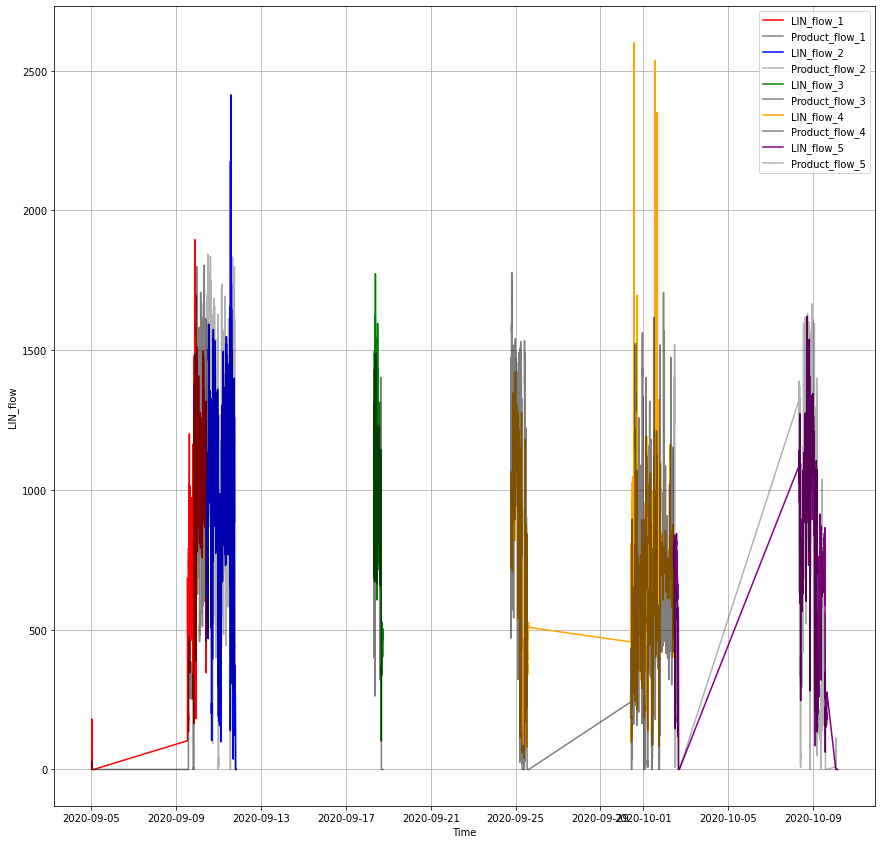

In [39]:
plt.figure(figsize=(50, 50))
ax = plt.subplot(3,3,3)
plt.plot(x_time_1, y_LIN_1, color="red", label="LIN_flow_1")
plt.plot(x_time_1, y_PROD_1, color="black", label="Product_flow_1", alpha=0.5)


plt.plot(x_time_2, y_LIN_2, color="blue", label="LIN_flow_2")
plt.plot(x_time_2, y_PROD_2, color="black", label="Product_flow_2", alpha=0.3)

plt.plot(x_time_3, y_LIN_3, color="green", label="LIN_flow_3")
plt.plot(x_time_3, y_PROD_3, color="black", label="Product_flow_3", alpha=0.5)

plt.plot(x_time_4, y_LIN_4, color="orange", label="LIN_flow_4")
plt.plot(x_time_4, y_PROD_4, color="black", label="Product_flow_4", alpha=0.5)

plt.plot(x_time_5, y_LIN_5, color="purple", label="LIN_flow_5")
plt.plot(x_time_5, y_PROD_5, color="black", label="Product_flow_5", alpha=0.3)


plt.xlabel("Time")
plt.ylabel("LIN_flow")
plt.grid(True)
plt.legend()

In [25]:
df_w_o_prod_flow.describe()
named_cols = df_w_o_prod_flow.columns[:-1]
named_cols

Index(['BeltAmpere_belt1', 'BeltAmpere_belt2', 'BeltAmpere_belt3',
       'Cumulative_LIN_flow', 'Cumulative_product_flow', 'FanAmpere_exhaust1',
       'FanAmpere_exhaust2', 'FanAmpere_side', 'FanAmpere_top',
       'Fanspeed_exhaust1', 'Fanspeed_exhaust2', 'Fanspeed_side',
       'Fanspeed_top', 'LIN_flow', 'Product_flow', 'ResidenceTime_belt1',
       'ResidenceTime_belt2', 'ResidenceTime_belt3', 'Temp_exhaust_in',
       'Temp_exhaust_out', 'Temp_product_in', 'Temp_product_out',
       'Temp_tunnel_measured', 'Temp_tunnel_set', 'Vanne_opening_rate'],
      dtype='object')

In [26]:
#Данные чистые, пустых значений нет
df_w_o_prod_flow.isnull().values.any()
df_w_o_prod_flow["_time"] = pd.to_datetime(df_w_o_prod_flow["_time"])

In [27]:
y = df_w_o_prod_flow["LIN_flow"]
x = df_w_o_prod_flow

In [28]:
print('Матрица корреляций всех признаков, кроме последнего:\n', x.iloc[:, :-1].corr())
print('\n')

print(x.shape)

Матрица корреляций всех признаков, кроме последнего:
                          BeltAmpere_belt1  BeltAmpere_belt2  BeltAmpere_belt3  \
BeltAmpere_belt1                 1.000000          0.882710          0.727264   
BeltAmpere_belt2                 0.882710          1.000000          0.873491   
BeltAmpere_belt3                 0.727264          0.873491          1.000000   
Cumulative_LIN_flow              0.169818          0.239684          0.021315   
Cumulative_product_flow          0.147747          0.204345          0.030962   
FanAmpere_exhaust1               0.246756          0.360391          0.403106   
FanAmpere_exhaust2               0.220320          0.338516          0.383693   
FanAmpere_side                   0.427717          0.685721          0.811888   
FanAmpere_top                    0.431760          0.687495          0.810180   
Fanspeed_exhaust1                0.069716          0.145208          0.147465   
Fanspeed_exhaust2                0.120046          0.30

In [29]:
# Посчитайте корреляции всех признаков, кроме последнего, с последним с помощью метода corrwith:
corr_ = x.corrwith(y, method='spearman')
# print(corr_, end='\n')
sa = dict(corr_).items()
sorted(sa, key = lambda x : x[1])
# max(sa, key = lambda x : x[1])

[('Temp_tunnel_set', -0.617516213948893),
 ('Temp_tunnel_measured', -0.6092807290001084),
 ('Temp_exhaust_out', -0.4323652919404144),
 ('Temp_exhaust_in', -0.3826367629905042),
 ('Temp_product_out', -0.3658584090699994),
 ('FanAmpere_exhaust1', 0.0014369722778948162),
 ('FanAmpere_exhaust2', 0.13650956765534547),
 ('Cumulative_product_flow', 0.1451064677540834),
 ('Cumulative_LIN_flow', 0.145132680152822),
 ('BeltAmpere_belt3', 0.19522140829969237),
 ('ResidenceTime_belt3', 0.19748483339530434),
 ('FanAmpere_side', 0.21940476669875794),
 ('Fanspeed_exhaust2', 0.22788316047815368),
 ('Fanspeed_exhaust1', 0.2299048510881773),
 ('Fanspeed_side', 0.3672034943293369),
 ('FanAmpere_top', 0.3858851202233079),
 ('Fanspeed_top', 0.43514730240990973),
 ('ResidenceTime_belt2', 0.44163214698880787),
 ('BeltAmpere_belt1', 0.4687662757166665),
 ('BeltAmpere_belt2', 0.5321118735483018),
 ('ResidenceTime_belt1', 0.5358695725164834),
 ('Temp_product_in', 0.559703404977006),
 ('Vanne_opening_rate', 0.57

<AxesSubplot:>

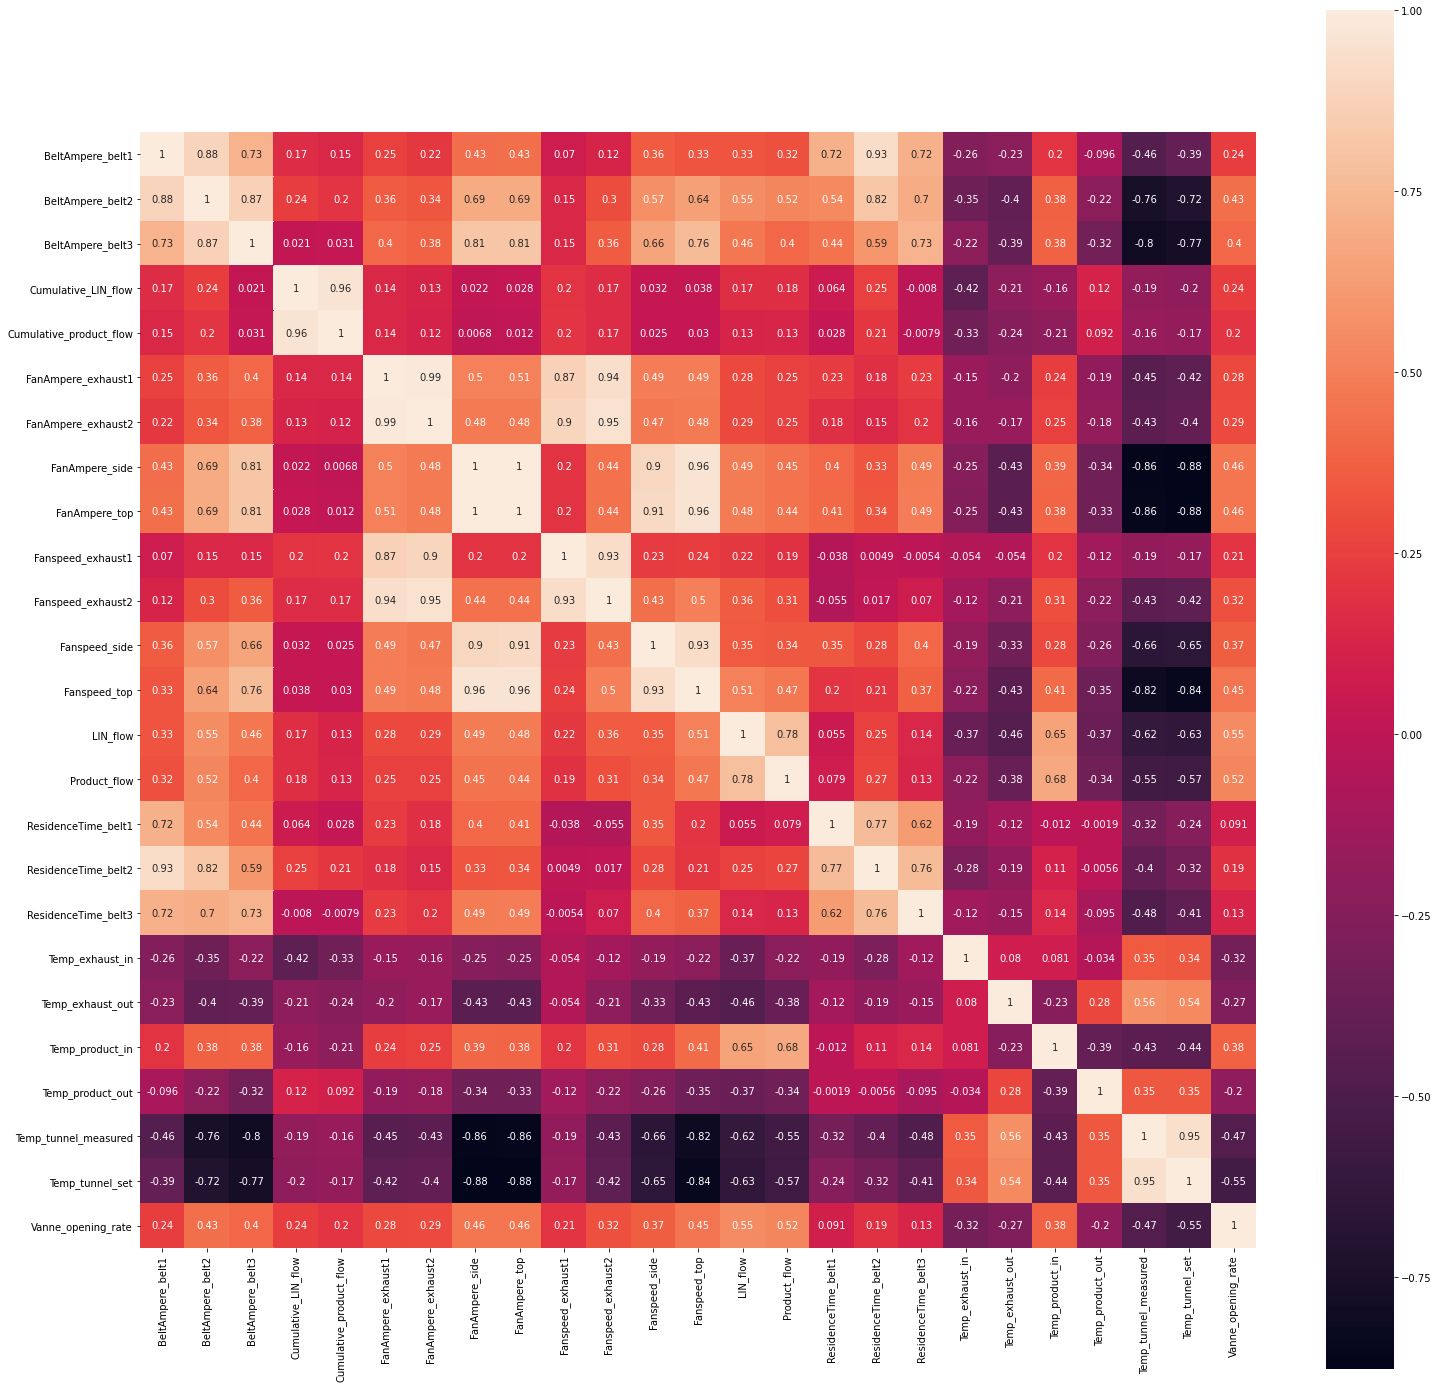

In [30]:
plt.figure(figsize=(25, 25))
sns.heatmap(x[::].corr(), square=True, annot=True)

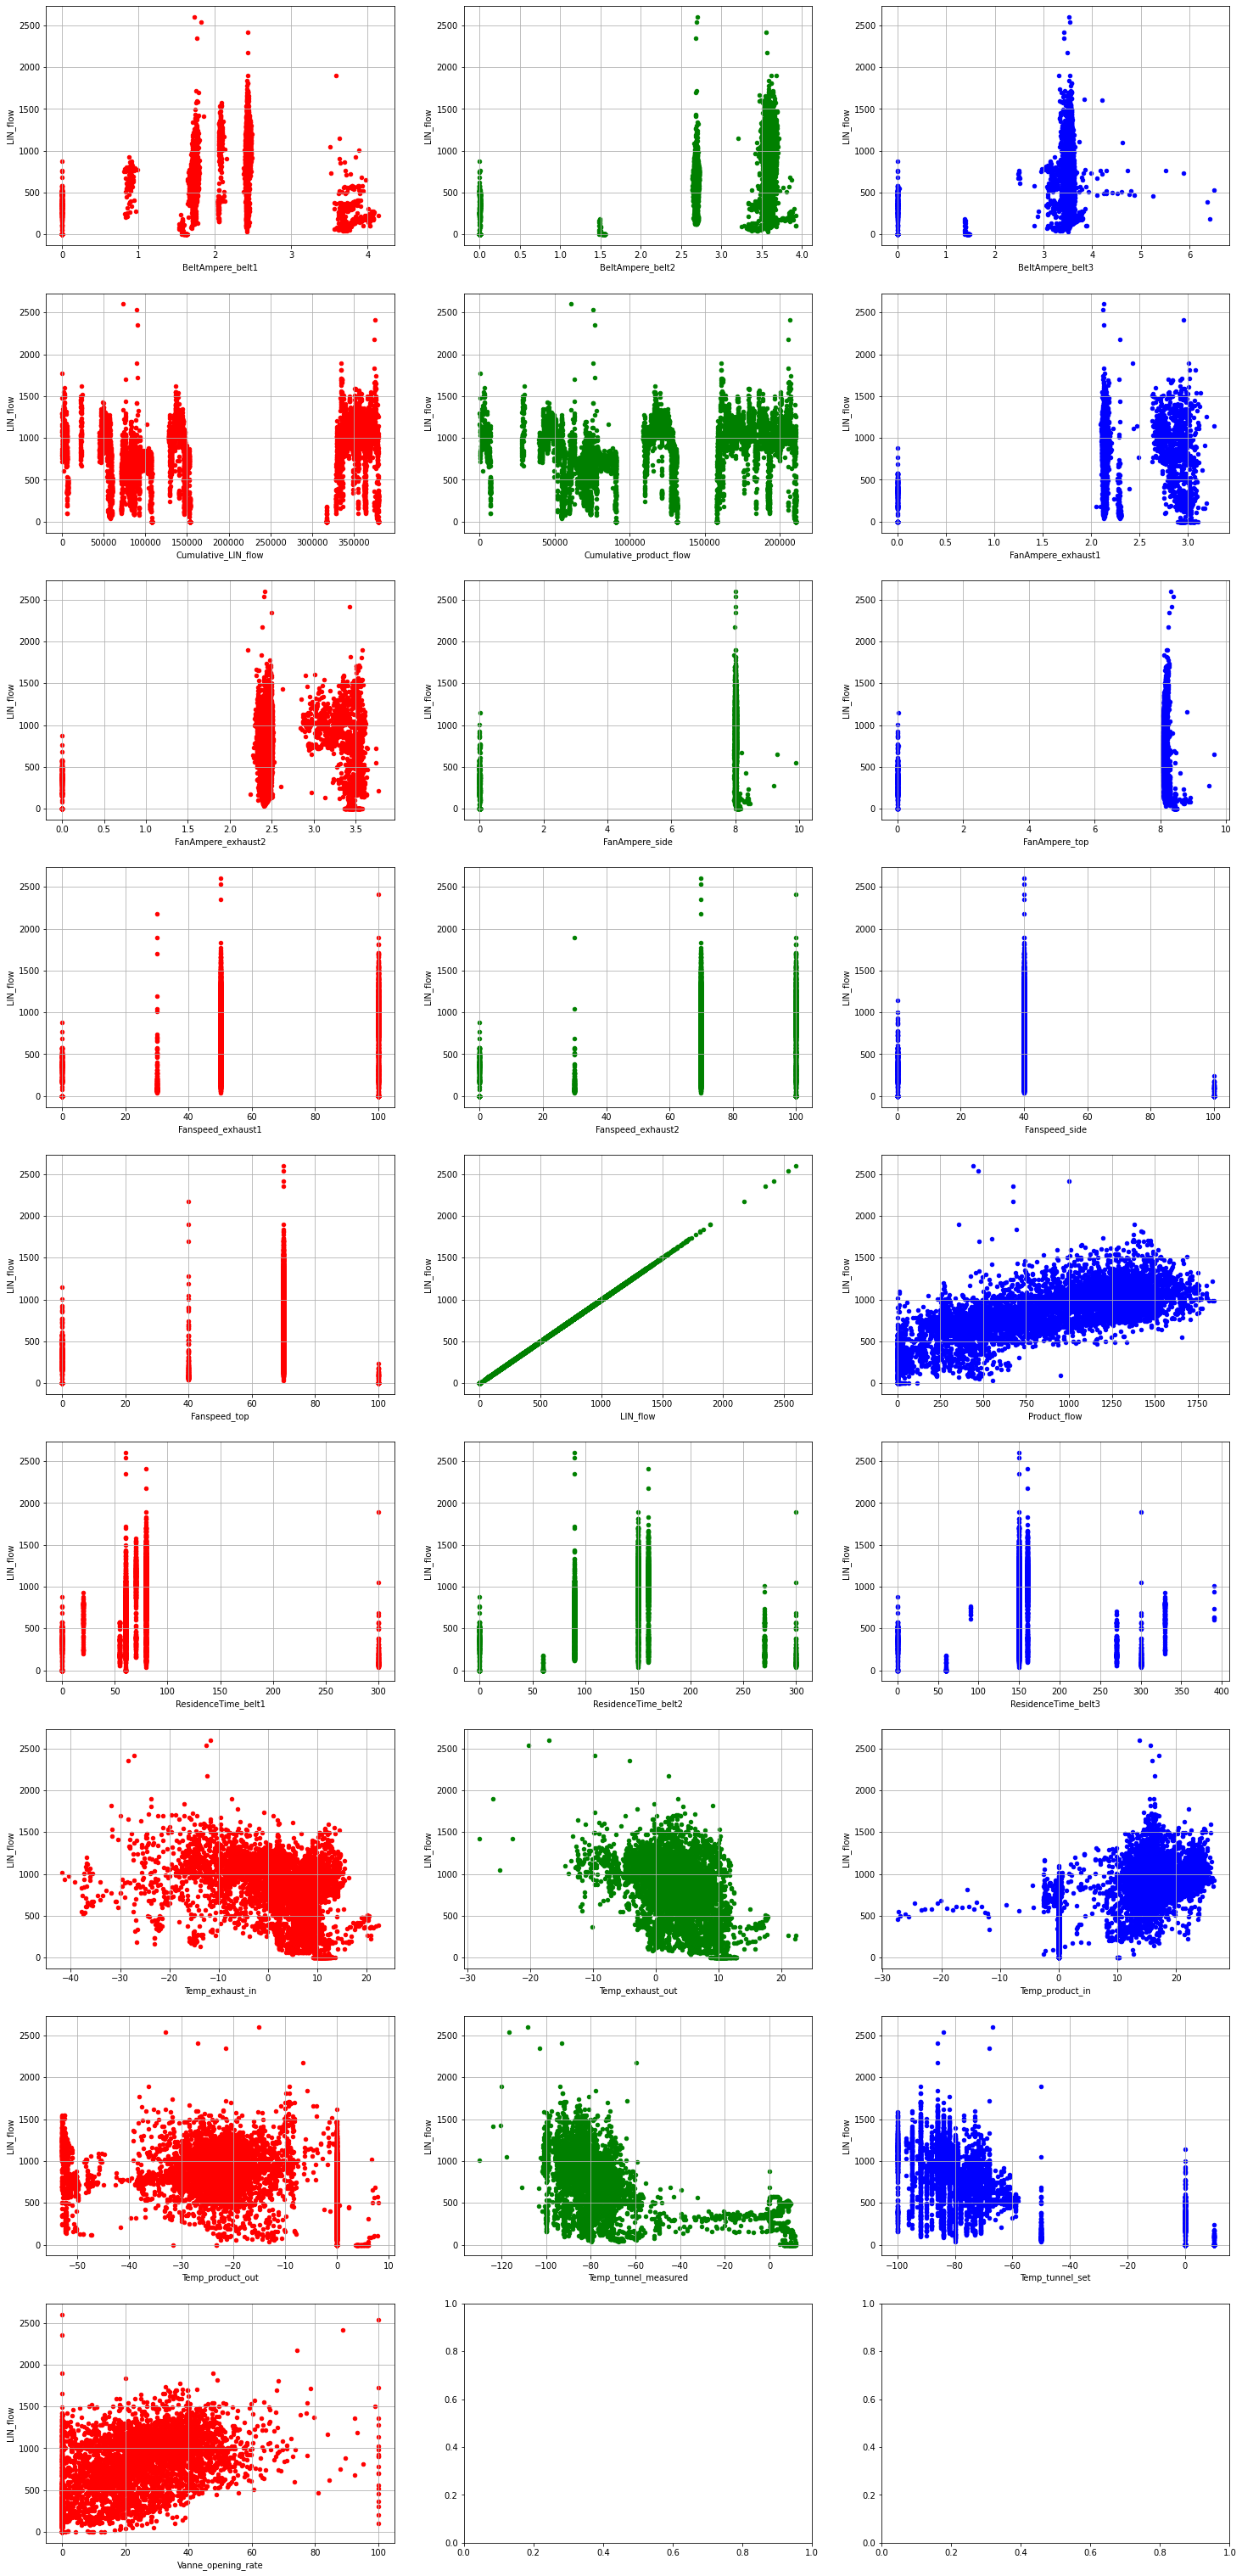

In [31]:
fig, axes = plt.subplots(nrows=9, ncols=3, figsize=(25, 55))
colormap = ["red", "green", "blue"]
for idx, feature in enumerate(x.columns[:-1]):
    x.plot(feature, "LIN_flow", subplots=True, kind="scatter", 
           ax=axes[idx // 3, idx % 3], color=colormap[idx % 3], grid=True)

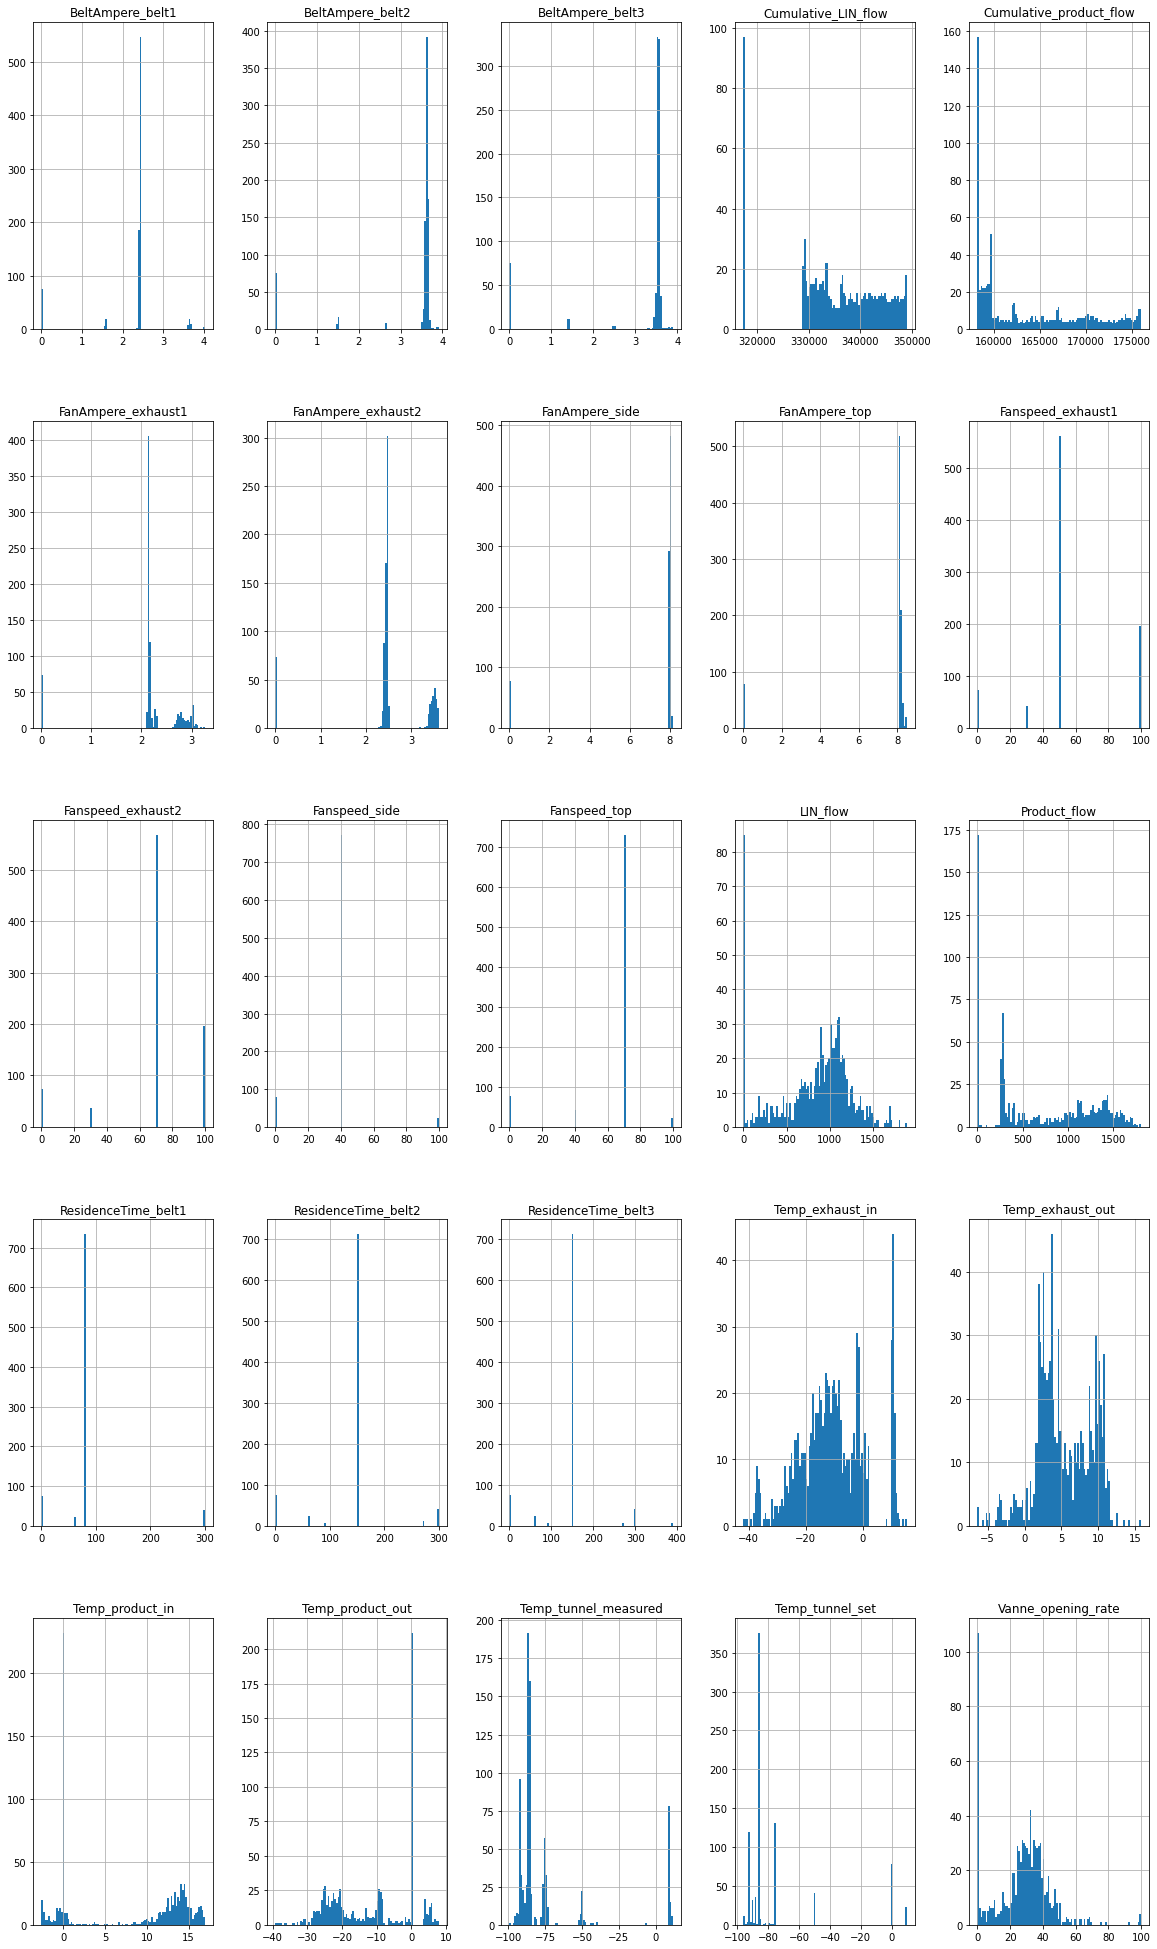

In [116]:
x.hist(figsize=(20, 35), bins=100);

In [117]:
x.mean()

BeltAmpere_belt1                2.254012
BeltAmpere_belt2                3.251982
BeltAmpere_belt3                3.176659
Cumulative_LIN_flow        335716.195652
Cumulative_product_flow    164111.508009
FanAmpere_exhaust1              2.140240
FanAmpere_exhaust2              2.481412
FanAmpere_side                  7.294226
FanAmpere_top                   7.437878
Fanspeed_exhaust1              56.052632
Fanspeed_exhaust2              69.187643
Fanspeed_side                  38.009153
Fanspeed_top                   63.066362
LIN_flow                      835.616443
Product_flow                  738.982124
ResidenceTime_belt1            82.929062
ResidenceTime_belt2           143.032037
ResidenceTime_belt3           143.855835
Temp_exhaust_in               -10.742906
Temp_exhaust_out                5.211670
Temp_product_in                 7.652874
Temp_product_out              -12.054773
Temp_tunnel_measured          -72.775629
Temp_tunnel_set               -73.620137
Vanne_opening_ra

In [118]:
from sklearn.preprocessing import StandardScaler, scale
from sklearn.utils import shuffle
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x.iloc[:, :-1])

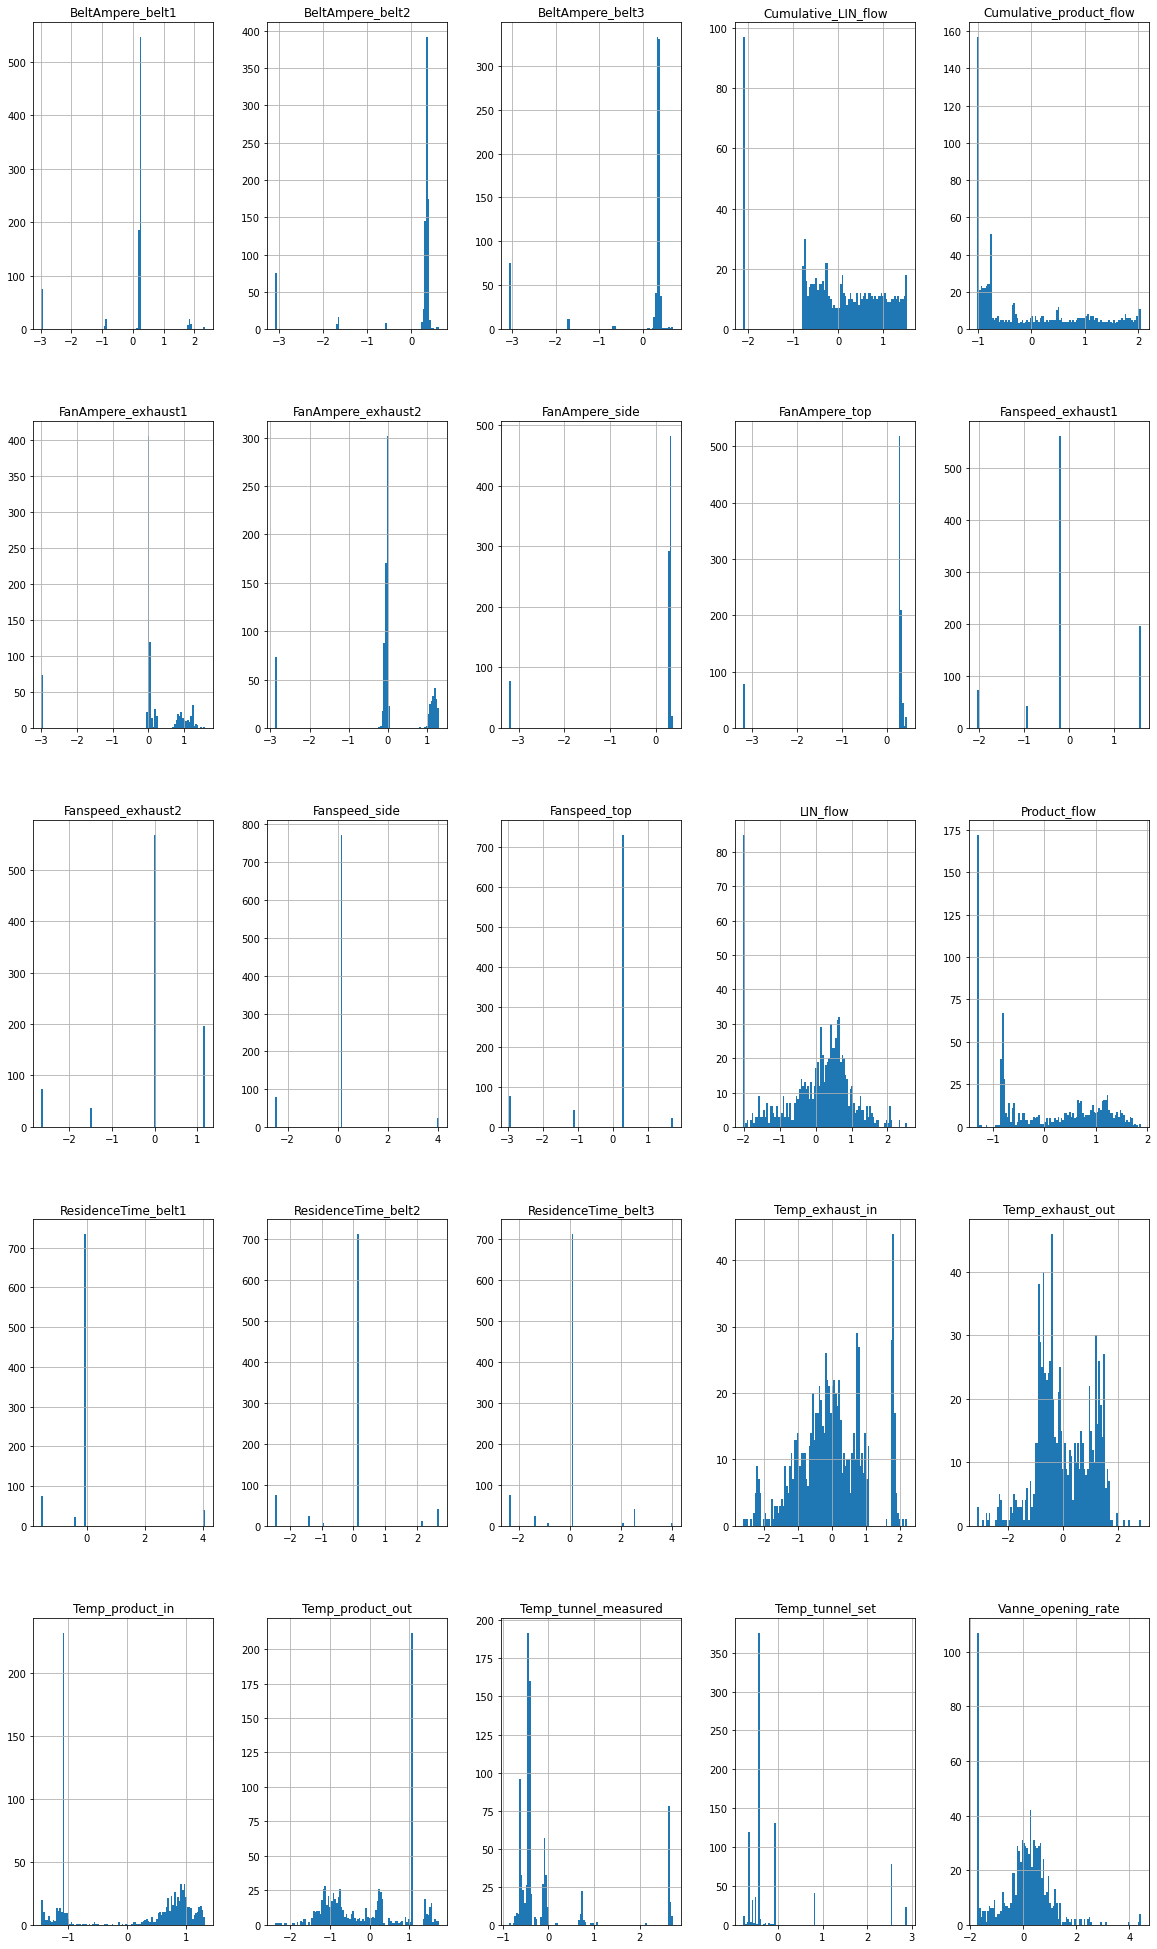

In [119]:
x_scaled = pd.DataFrame(x_scaled, columns=named_cols)
x_scaled.hist(figsize=(20, 35), bins=100);

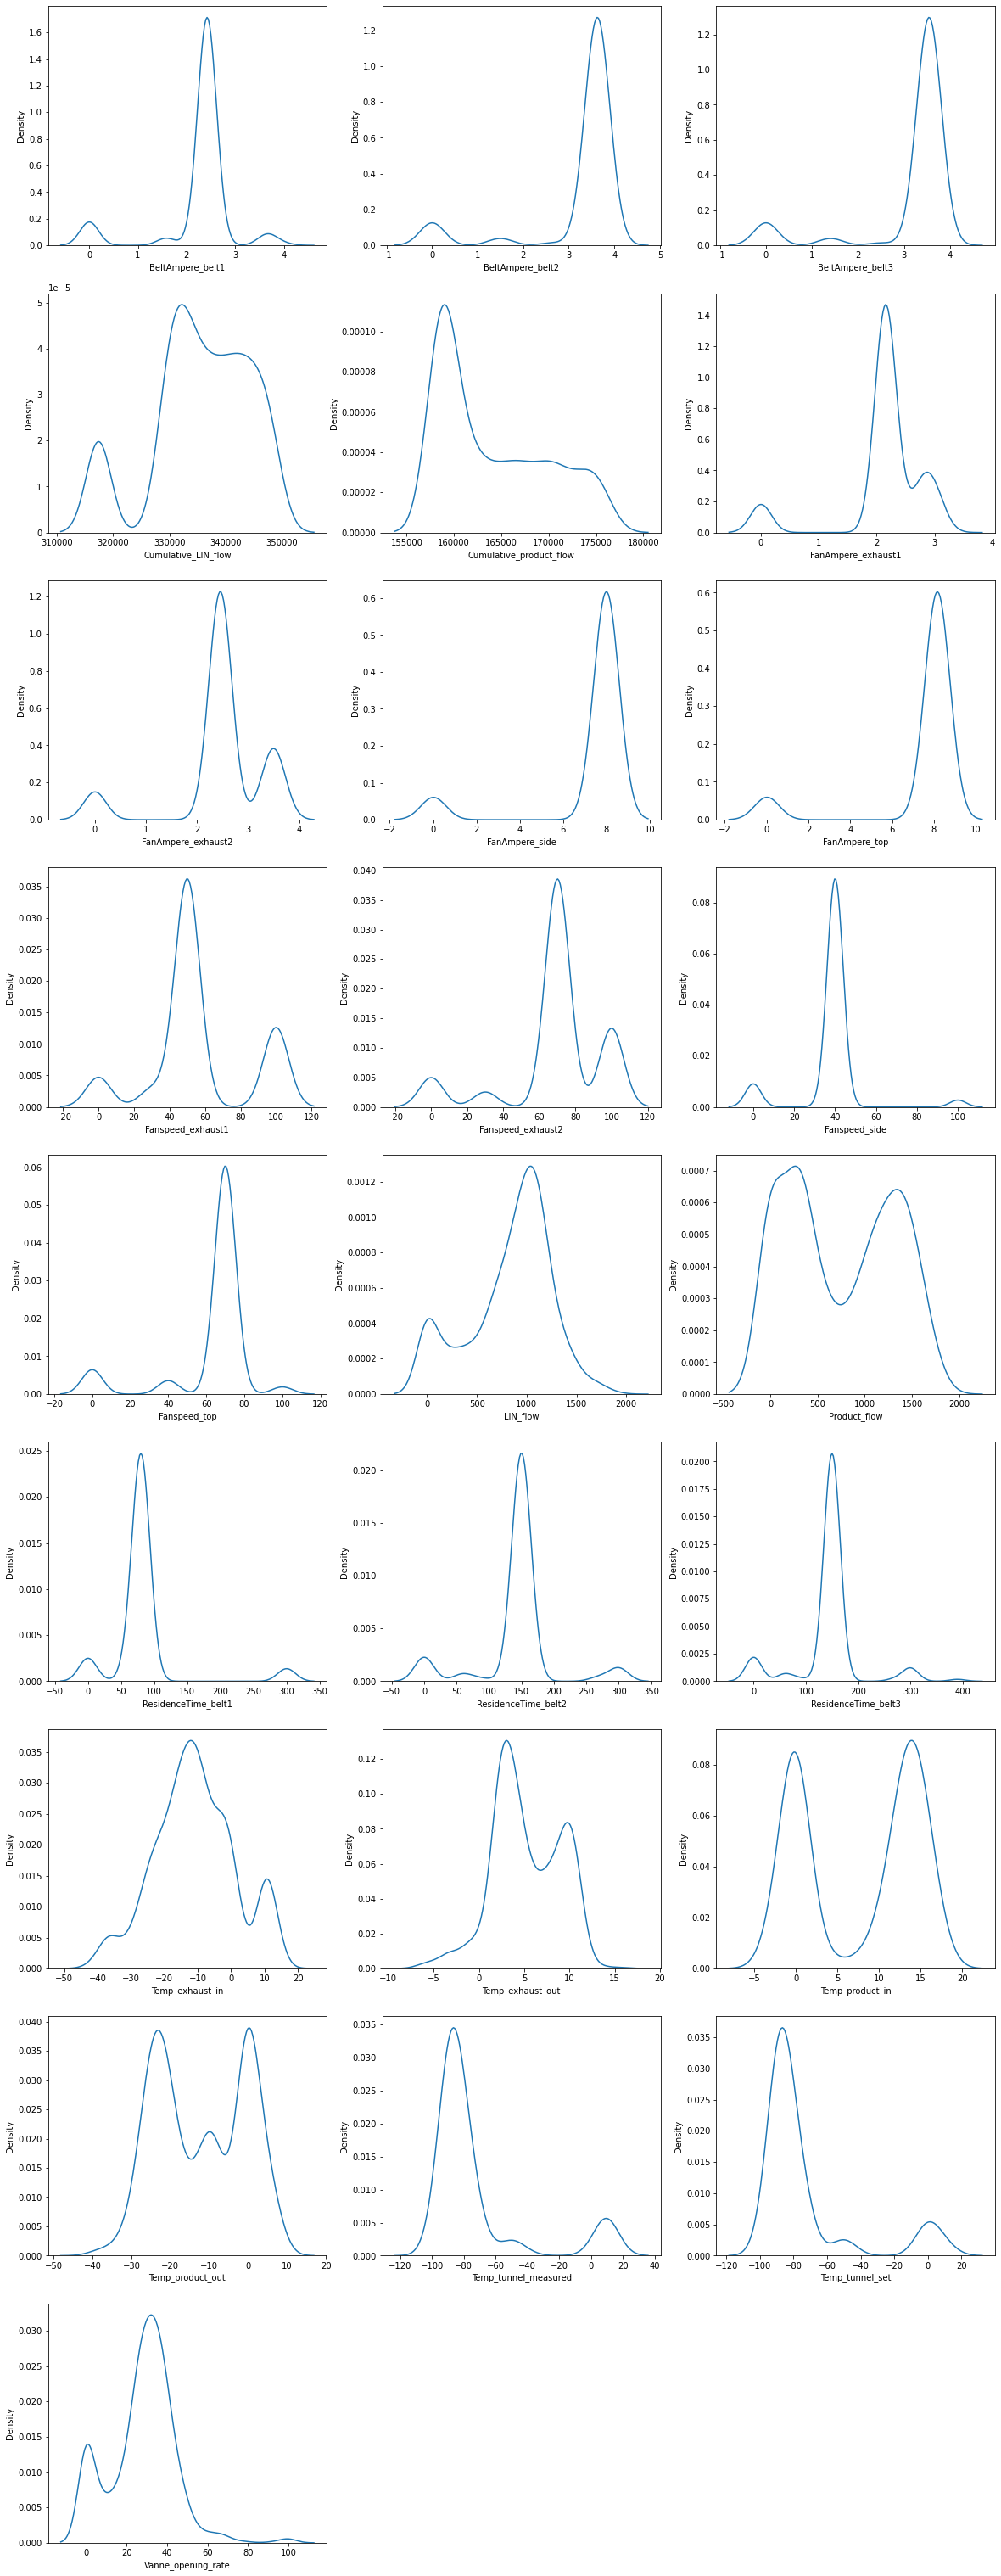

In [123]:
plt.figure(figsize=(20, 55))
for i, feature in enumerate(x_scaled.columns):
    plt.subplot(9, 3, i+1)
    sns.kdeplot(x[feature])
    plt.xlabel(feature)
plt.show()


In [124]:
df_shuffled = shuffle(x, random_state=123)
X = df_shuffled[df_shuffled.columns[:-1]]
X = scale(df_shuffled.drop(["LIN_flow", "_time"], 1))
y = df_shuffled["LIN_flow"]

df_shuffled = df_shuffled.drop(["LIN_flow"], 1)
print(X)
print('\n')
print(y)

[[ 0.22910599  0.35876476  0.40263563 ... -0.60758927 -0.635774
   0.69408242]
 [ 0.22265294  0.38071986  0.37376493 ... -0.43006721 -0.42822925
   0.24299895]
 [ 0.21619976  0.37840881  0.34548347 ... -0.45911627 -0.42822925
  -0.28666982]
 ...
 [ 0.2363656   0.34547626  0.37317568 ... -0.53335277 -0.60118321
   1.77688313]
 [ 0.22749272  0.32814326  0.35667816 ... -0.53658044 -0.56659242
   0.58763336]
 [ 0.22426607  0.36858679  0.33782376 ... -0.43652256 -0.42822925
   0.13334434]]


372    1133.463900
517    1315.660400
791    1086.152700
145     691.787000
151     938.515260
          ...     
98      103.925545
322     883.739900
382     931.782700
365     876.326800
510     939.815250
Name: LIN_flow, Length: 874, dtype: float64


In [125]:
from sklearn.linear_model import LinearRegression

In [126]:
regr = LinearRegression()
regr.fit(X, y)
print('Коэффициенты: ')
list(zip(df_shuffled.columns, regr.coef_))

Коэффициенты: 


[('BeltAmpere_belt1', -32.9341400688907),
 ('BeltAmpere_belt2', -358.2827567982713),
 ('BeltAmpere_belt3', 730.7308943828996),
 ('Cumulative_LIN_flow', -728.7428396344851),
 ('Cumulative_product_flow', 423.88589092151517),
 ('FanAmpere_exhaust1', 128.3067924065716),
 ('FanAmpere_exhaust2', -406.88106666564994),
 ('FanAmpere_side', -2677.028803156742),
 ('FanAmpere_top', 3482.5944227705054),
 ('Fanspeed_exhaust1', 105.48989096940095),
 ('Fanspeed_exhaust2', 236.0445818466101),
 ('Fanspeed_side', -636.0833105580948),
 ('Fanspeed_top', 87.64204002458357),
 ('Product_flow', 112.90508601853277),
 ('ResidenceTime_belt1', 4.420252859163338),
 ('ResidenceTime_belt2', -154.8267187589223),
 ('ResidenceTime_belt3', 8.46381843584529),
 ('Temp_exhaust_in', -19.995339454597946),
 ('Temp_exhaust_out', -59.16463320840835),
 ('Temp_product_in', 198.6180745468365),
 ('Temp_product_out', 9.471605799475906),
 ('Temp_tunnel_measured', -363.47462662617846),
 ('Temp_tunnel_set', 589.2601139838563),
 ('Vanne_

In [127]:
from sklearn.linear_model import Lasso, Ridge

In [128]:
regLasso = Lasso()
regLasso.fit(X, y)
print('Коэффициенты:')
list(zip(df_shuffled.columns, regLasso.coef_))

Коэффициенты:


[('BeltAmpere_belt1', -0.0),
 ('BeltAmpere_belt2', 0.0),
 ('BeltAmpere_belt3', 185.957580535992),
 ('Cumulative_LIN_flow', -81.83147800339272),
 ('Cumulative_product_flow', 13.850356437922853),
 ('FanAmpere_exhaust1', 35.8206296589792),
 ('FanAmpere_exhaust2', -0.0),
 ('FanAmpere_side', 101.7719473392673),
 ('FanAmpere_top', 0.0),
 ('Fanspeed_exhaust1', 0.0),
 ('Fanspeed_exhaust2', 0.0),
 ('Fanspeed_side', -141.69798307369177),
 ('Fanspeed_top', 67.94451613608516),
 ('Product_flow', 114.70678866960577),
 ('ResidenceTime_belt1', -21.423339366467484),
 ('ResidenceTime_belt2', -74.75737239639757),
 ('ResidenceTime_belt3', -0.06742162085195999),
 ('Temp_exhaust_in', -50.91532146464874),
 ('Temp_exhaust_out', -37.01888514601227),
 ('Temp_product_in', 141.38985035152288),
 ('Temp_product_out', 0.0),
 ('Temp_tunnel_measured', 0.0),
 ('Temp_tunnel_set', 42.5839436025951),
 ('Vanne_opening_rate', 17.233525695703506)]

In [129]:
regRidge = Ridge()
regRidge.fit(X, y)
print('Коэффициенты: ')
list(zip(df_shuffled.columns, regRidge.coef_))

Коэффициенты: 


[('BeltAmpere_belt1', -21.756895228446382),
 ('BeltAmpere_belt2', 30.66856322634389),
 ('BeltAmpere_belt3', 281.12304152293973),
 ('Cumulative_LIN_flow', -413.6967483707529),
 ('Cumulative_product_flow', 225.36090242421065),
 ('FanAmpere_exhaust1', 135.36491725973073),
 ('FanAmpere_exhaust2', -212.46075088636726),
 ('FanAmpere_side', 167.73315456090313),
 ('FanAmpere_top', 245.82796152855056),
 ('Fanspeed_exhaust1', 70.41877727539647),
 ('Fanspeed_exhaust2', 57.88167896123637),
 ('Fanspeed_side', -352.13999238406575),
 ('Fanspeed_top', 71.4335476582651),
 ('Product_flow', 110.55543687954676),
 ('ResidenceTime_belt1', -14.065897486796622),
 ('ResidenceTime_belt2', -113.26124550617564),
 ('ResidenceTime_belt3', -0.32088673666540884),
 ('Temp_exhaust_in', -47.858447216470196),
 ('Temp_exhaust_out', -52.554919501260265),
 ('Temp_product_in', 165.167906621806),
 ('Temp_product_out', 13.192218415481296),
 ('Temp_tunnel_measured', -113.30737116324698),
 ('Temp_tunnel_set', 256.7090108347167),

In [130]:
# Код 3.1 (1 балл)
alphas = np.arange(1, 500, 50)
coefs_lasso = np.zeros((alphas.shape[0], X.shape[1])) # матрица весов размера (число регрессоров) x (число признаков)
coefs_ridge = np.zeros((alphas.shape[0], X.shape[1]))
# Для каждого значения коэффициента из alphas обучите регрессор Lasso
# и запишите веса в соответствующую строку матрицы coefs_lasso (вспомните встроенную в python функцию enumerate),
# а затем обучите Ridge и запишите веса в coefs_ridge.

for i, item in enumerate(alphas):
    reg_Lasso = Lasso(alpha = alphas[i])
    reg_Lasso.fit(X, y)
    coefs_lasso[i,:] = reg_Lasso.coef_

for i, item in enumerate(alphas):
    reg_Ridge = Ridge(alpha = alphas[i])
    reg_Ridge.fit(X, y)
    coefs_ridge[i,:] = reg_Ridge.coef_

Text(0.5, 1.0, 'Ridge')

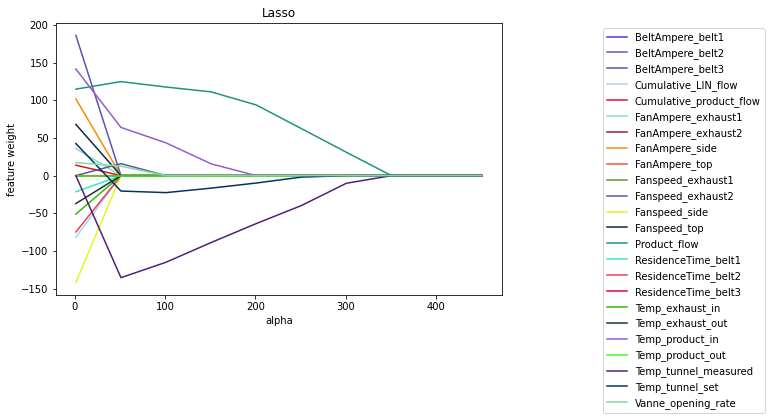

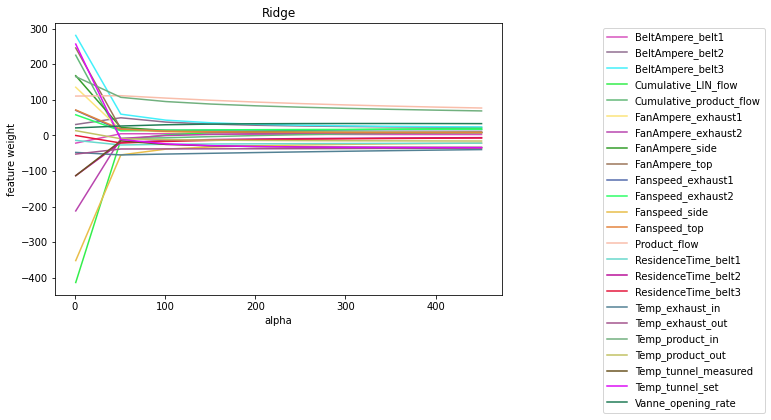

In [131]:
plt.figure(figsize=(8, 5))

for coef, feature in zip(coefs_lasso.T, df_shuffled.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))
    
plt.legend(loc="upper right", bbox_to_anchor=(1.6, 1))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")

plt.figure(figsize=(8, 5))

for coef, feature in zip(coefs_ridge.T, df_shuffled.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))
    
plt.legend(loc="upper right", bbox_to_anchor=(1.6, 1))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")

In [132]:
from sklearn.linear_model import LassoCV

Матрица переменной mse_path_: 
 [[35503.95283035 44808.46465247 42312.9295626  48007.7953782
  50045.73162014]
 [34475.97751014 43631.19573445 40873.89405517 46801.26114225
  48435.09000262]
 [33508.94213543 42515.51107246 39510.94212278 45654.50722478
  46815.48670061]
 [32605.64273444 41461.39032462 38224.06633328 44451.49263686
  45217.00116892]
 [31697.27252564 40468.83025735 37013.21765027 43205.93028253
  43709.00900936]
 [30866.33508522 39537.8303565  35826.96273851 41998.21475623
  42291.3795505 ]
 [30112.83876026 38668.39054037 34658.55658469 40862.07237732
  40964.16593087]
 [29436.78515667 37860.44740332 33571.74372327 39797.06750333
  39727.38064688]
 [28838.19019715 37114.11970372 32571.12854213 38803.36859496
  38581.11192265]
 [28280.34309411 36318.70306944 31656.72900679 37880.97888122
  37486.86718222]
 [27713.59088576 35411.52330538 30828.55099651 37029.88916435
  36398.34865437]
 [27243.44235658 34527.49173947 29903.81466615 36126.76898817
  35420.3405057 ]
 [26869.7

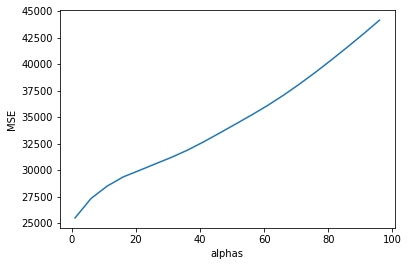

Выбранное alpha: 1 

Вектор коэффициентов для выбранного alpha:


[('BeltAmpere_belt1', -0.0),
 ('BeltAmpere_belt2', 0.0),
 ('BeltAmpere_belt3', 185.957580535992),
 ('Cumulative_LIN_flow', -81.83147800339272),
 ('Cumulative_product_flow', 13.850356437922853),
 ('FanAmpere_exhaust1', 35.8206296589792),
 ('FanAmpere_exhaust2', -0.0),
 ('FanAmpere_side', 101.7719473392673),
 ('FanAmpere_top', 0.0),
 ('Fanspeed_exhaust1', 0.0),
 ('Fanspeed_exhaust2', 0.0),
 ('Fanspeed_side', -141.69798307369177),
 ('Fanspeed_top', 67.94451613608516),
 ('Product_flow', 114.70678866960577),
 ('ResidenceTime_belt1', -21.423339366467484),
 ('ResidenceTime_belt2', -74.75737239639757),
 ('ResidenceTime_belt3', -0.06742162085195999),
 ('Temp_exhaust_in', -50.91532146464874),
 ('Temp_exhaust_out', -37.01888514601227),
 ('Temp_product_in', 141.38985035152288),
 ('Temp_product_out', 0.0),
 ('Temp_tunnel_measured', 0.0),
 ('Temp_tunnel_set', 42.5839436025951),
 ('Vanne_opening_rate', 17.233525695703506)]

In [133]:
# Код 3.2 (1 балл)
# Обучите регрессор LassoCV на всех параметрах регуляризации из alpha
# Постройте график _усредненного_ по строкам MSE в зависимости от alpha. 
# Выведите выбранное alpha, а также пары "признак-коэффициент" для обученного вектора коэффициентов

alphas = np.arange(1, 100, 5)
regLassoCV = LassoCV(alphas=alphas)
regLassoCV.fit(X, y)
print('Матрица переменной mse_path_: \n', regLassoCV.mse_path_)

plt.plot(regLassoCV.alphas_, regLassoCV.mse_path_.mean(axis=1))
plt.xlabel('alphas')
plt.ylabel('MSE')
plt.show()

print('Выбранное alpha:', regLassoCV.alpha_, '\n')
print('Вектор коэффициентов для выбранного alpha:')
list(zip(df_shuffled.columns, regLassoCV.coef_))

[1, 1, 1]

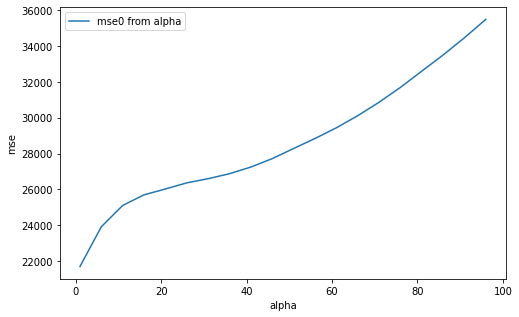

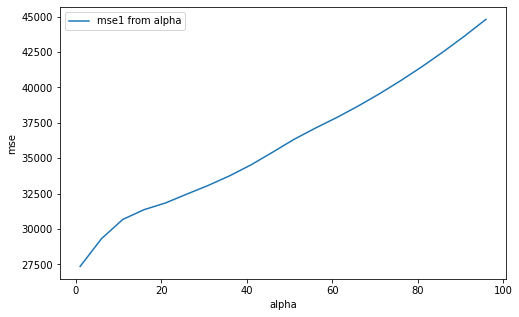

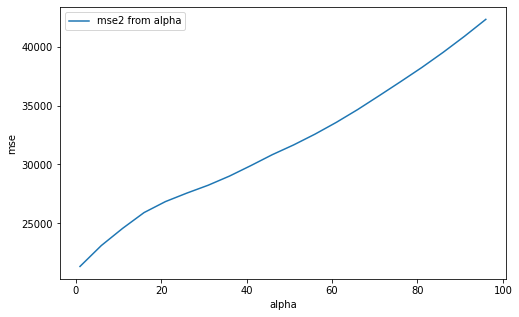

In [134]:
min_alphas = []
for i in range(3):
    z = dict(zip(regLassoCV.alphas_, regLassoCV.mse_path_[:, i]))
    min_alphas.append(sorted(z, key=z.get)[0])
    plt.figure(figsize=(8, 5))
    plt.plot(regLassoCV.alphas_, regLassoCV.mse_path_[:, i], label='mse{} from alpha'.format(i))
    plt.legend(loc='best')
    plt.xlabel('alpha')
    plt.ylabel('mse')

min_alphas